In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"vpd.csv")

In [5]:
df.columns

Index(['DATEPRD', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL', 'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [7]:
df.drop("NPD_WELL_BORE_CODE", inplace=True, axis=1)

In [8]:
def well_dataframe(well_name):
    """
    This Function receives the well name and filters the dataframe based on the name.
    """

    df_well = df[df["NPD_WELL_BORE_NAME"] == well_name]
    df_well = df_well.reset_index()
    
    if "index" in df_well.columns:
        df_well.drop("index", axis=1, inplace=True)
    else:
        df_well = df_well
        
    df_well["DATEPRD"] = pd.to_datetime(df_well["DATEPRD"])

    return df_well

In [9]:
df["NPD_WELL_BORE_NAME"].value_counts()

15/9-F-4       3327
15/9-F-5       3306
15/9-F-12      3056
15/9-F-14      3056
15/9-F-11      1165
15/9-F-15 D     978
15/9-F-1 C      746
Name: NPD_WELL_BORE_NAME, dtype: int64

<Axes: >

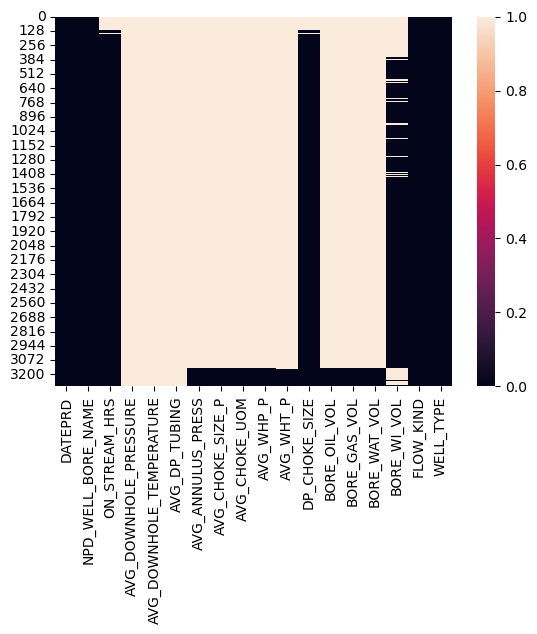

In [22]:
inj_2 = df[df["NPD_WELL_BORE_NAME"] == "15/9-F-5"].reset_index()
inj_2.drop("index", axis=1, inplace=True)
inj_2["DATEPRD"] = pd.to_datetime(inj_2["DATEPRD"])
sns.heatmap(inj_2.isna())


In [23]:
inj_2["WELL_TYPE"].value_counts()

WI    3162
OP     144
Name: WELL_TYPE, dtype: int64

In [24]:
inj_2["FLOW_KIND"].value_counts()

injection     3146
production     160
Name: FLOW_KIND, dtype: int64

array([<Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>], dtype=object)

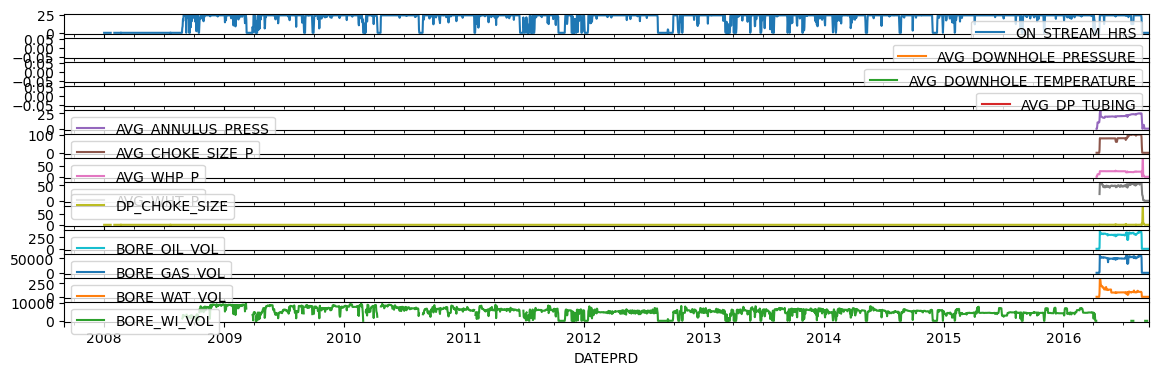

In [14]:
inj_2.set_index("DATEPRD").plot(subplots=True, figsize=(14, 4))

In [25]:
inj_2 = inj_2[inj_2["FLOW_KIND"] == "injection"]

In [26]:
inj_2["WELL_TYPE"].value_counts()

WI    3146
Name: WELL_TYPE, dtype: int64

array([<Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>], dtype=object)

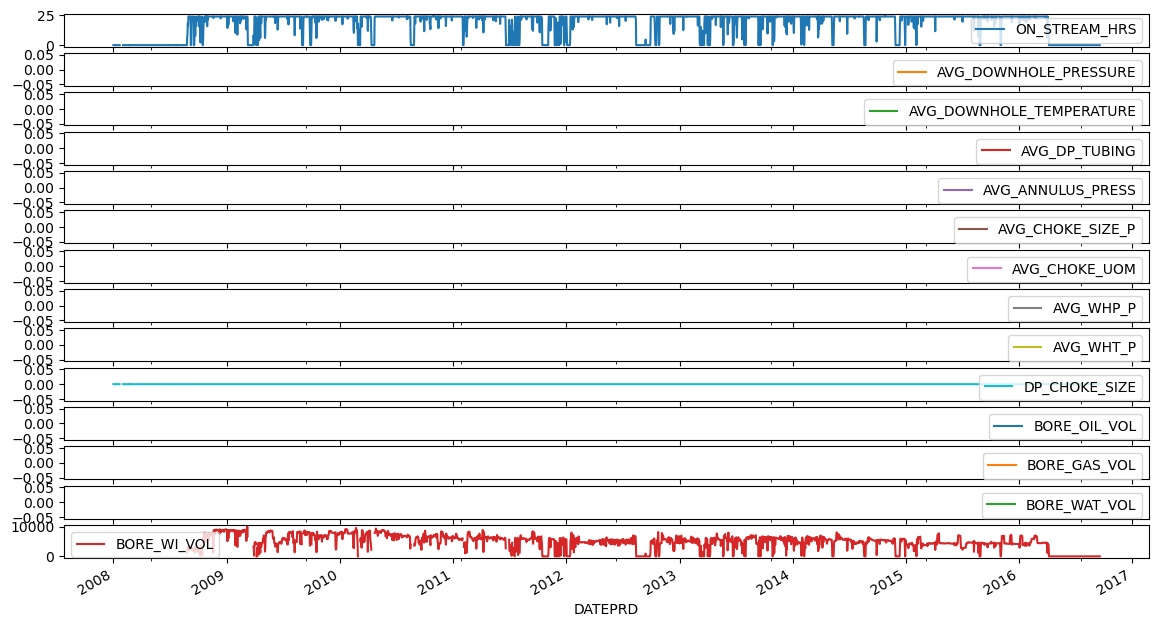

In [28]:
inj_2.set_index("DATEPRD").plot(subplots=True, figsize=(14, 8))

<Axes: >

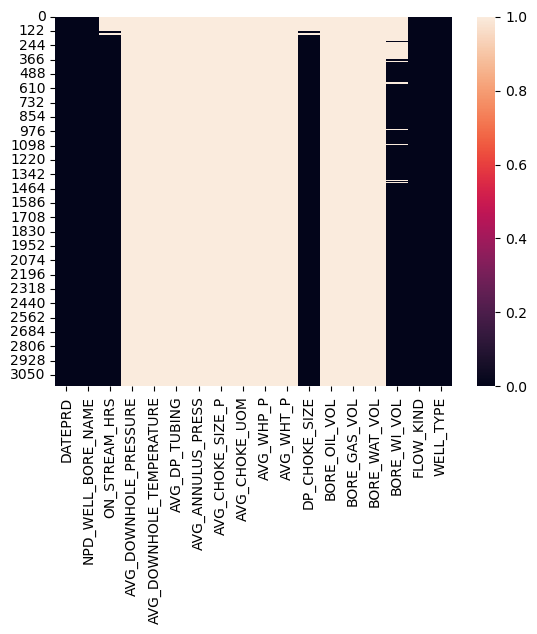

In [27]:
sns.heatmap(inj_2.isna())

<Axes: >

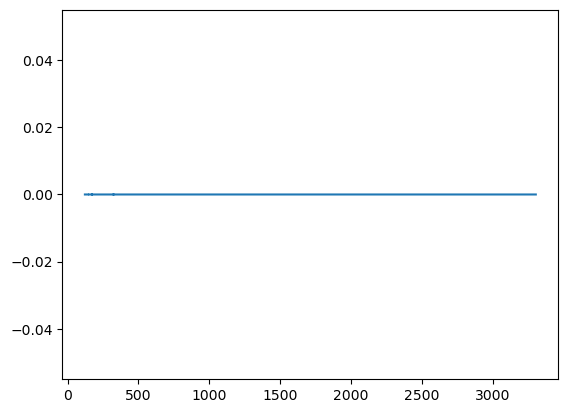

In [29]:
inj_2["DP_CHOKE_SIZE"].plot()

In [32]:
inj_2.drop(['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',\
           'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P',\
                'AVG_WHT_P', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'FLOW_KIND', 'WELL_TYPE',\
                    "DP_CHOKE_SIZE", "NPD_WELL_BORE_NAME"], axis=1, inplace=True)

array([<Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>], dtype=object)

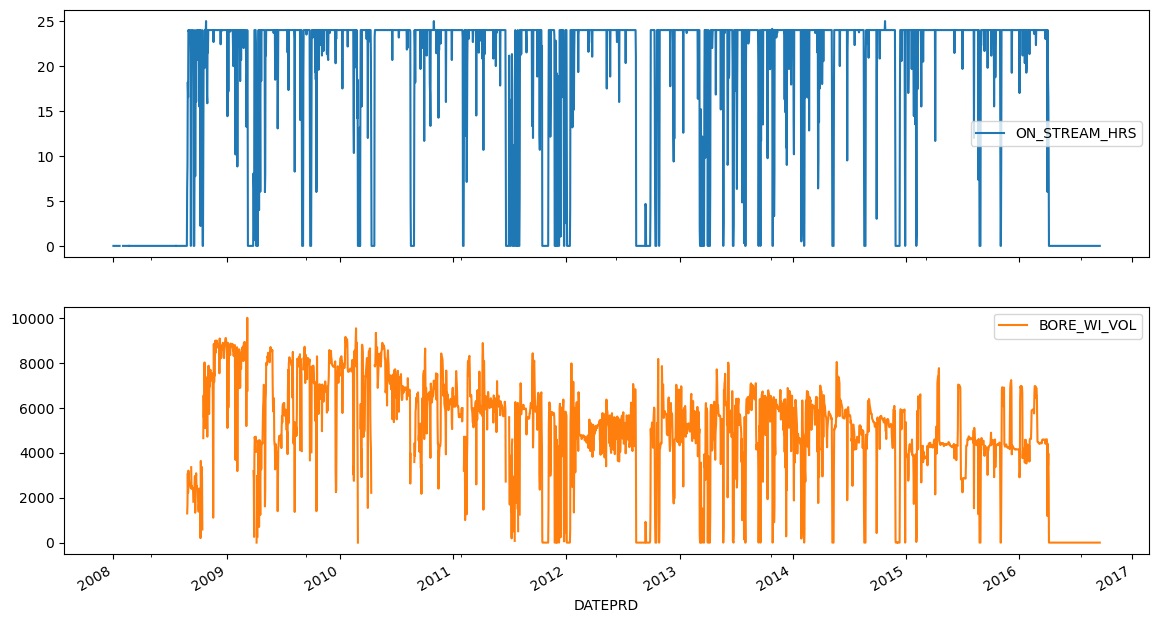

In [33]:
inj_2.set_index("DATEPRD").plot(subplots=True, figsize=(14, 8))

<Axes: >

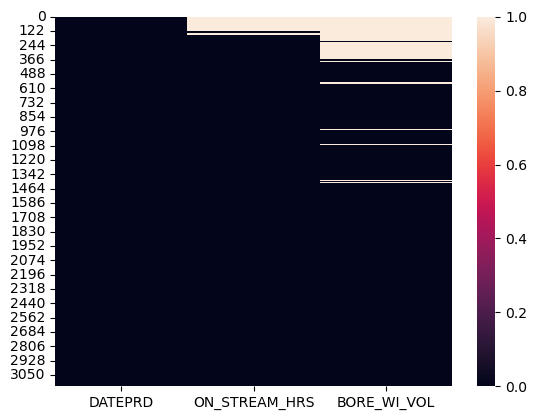

In [34]:
sns.heatmap(inj_2.isna())

<Axes: >

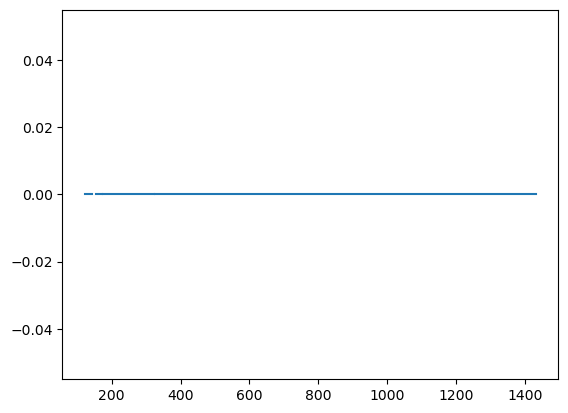

In [36]:
inj_2[inj_2["BORE_WI_VOL"].isna()]["ON_STREAM_HRS"].plot()
# Plot on_sTREAM_HRS where the WI is null. If HRS is zero then there is no Injection!

<Axes: >

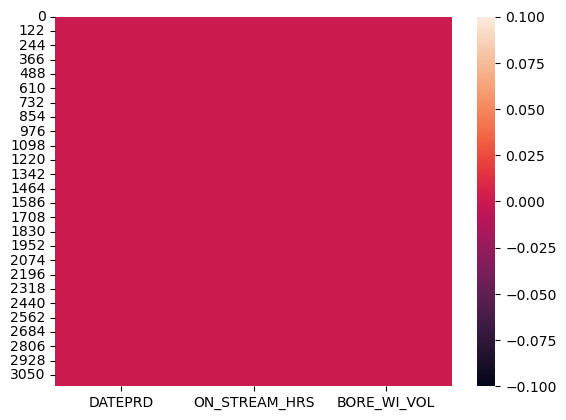

In [38]:
inj_2.fillna(value=0, inplace=True)
sns.heatmap(inj_2.isna())

In [40]:
inj_1 = well_dataframe("15/9-F-4") # This well is injection well. Therefore only WI column and On Streaam Hours are good to use.
# (Line 15 - 33 Interactive code)
inj_1.drop(['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',\
           'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P',\
                'AVG_WHT_P', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'FLOW_KIND', 'WELL_TYPE',\
                    "DP_CHOKE_SIZE", "NPD_WELL_BORE_NAME"], axis=1, inplace=True)
inj_1.fillna(value=0, inplace=True)

In [52]:
df_inj = inj_1.merge(inj_2, on="DATEPRD", how="inner").reset_index()
df_inj

,index,DATEPRD,ON_STREAM_HRS_x,BORE_WI_VOL_x,ON_STREAM_HRS_y,BORE_WI_VOL_y
0,0,2007-09-01,0.0,0.0,0.0,0.0
1,1,2007-09-02,0.0,0.0,0.0,0.0
2,2,2007-09-03,0.0,0.0,0.0,0.0
3,3,2007-09-04,0.0,0.0,0.0,0.0
4,4,2007-09-05,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
3141,3141,2016-04-07,24.0,7938.0,0.0,0.0
3142,3142,2016-04-08,24.0,8077.0,0.0,0.0
3143,3143,2016-04-09,24.0,8043.0,0.0,0.0
3144,3144,2016-04-10,24.0,8059.0,0.0,0.0


<Axes: >

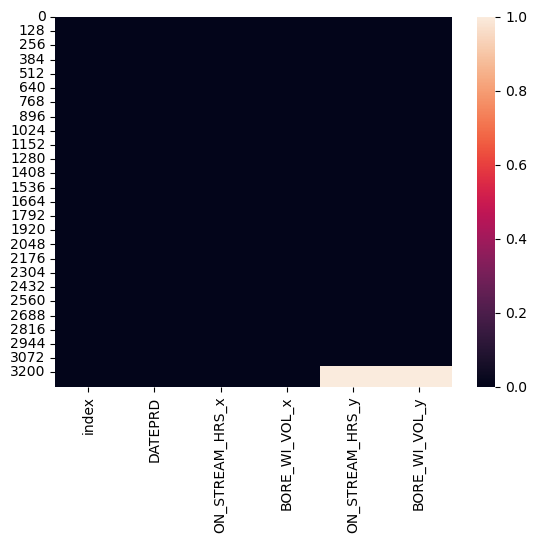

In [51]:
sns.heatmap(df_inj.isna())

In [44]:
inj_1["DATEPRD"].value_counts()

2007-09-01    1
2013-10-01    1
2013-09-21    1
2013-09-22    1
2013-09-23    1
             ..
2010-09-17    1
2010-09-18    1
2010-09-19    1
2010-09-20    1
2016-12-01    1
Name: DATEPRD, Length: 3327, dtype: int64

In [45]:
inj_2["DATEPRD"].value_counts()

2007-09-01    1
2013-05-21    1
2013-05-23    1
2013-05-24    1
2013-05-25    1
             ..
2010-07-18    1
2010-07-19    1
2010-07-20    1
2010-07-21    1
2016-09-18    1
Name: DATEPRD, Length: 3146, dtype: int64

Here I wan to see if the dates of two injection wells are overlapping

In [46]:
date_overlap = inj_1["DATEPRD"].isin(inj_2["DATEPRD"]) # This way you can check in if all the dates from inj_1 is included in inj2

In [47]:
date_overlap.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3327 entries, 0 to 3326
Series name: DATEPRD
Non-Null Count  Dtype
--------------  -----
3327 non-null   bool 
dtypes: bool(1)
memory usage: 3.4 KB


I want to see if the production time of inj_2 is included in the inj_1. Because I dont know if I should fill merge.outer with zero or I should drop the NA parts after merging. It seems that the production time of inj_2 is the same time of inj_1 and therefore cannot set to be zero.   This is a production time and must be deprectaed.

In [56]:
prod_2 = df[df["NPD_WELL_BORE_NAME"] == "15/9-F-5"].reset_index()


In [57]:
prod_2.drop("index", axis=1, inplace=True)

In [59]:
prod_2["DATEPRD"] = pd.to_datetime(prod_2["DATEPRD"])

In [61]:
prod_2["FLOW_KIND"].value_counts()

injection     3146
production     160
Name: FLOW_KIND, dtype: int64

In [62]:
prod_2 = prod_2[prod_2["FLOW_KIND"] == "production"]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

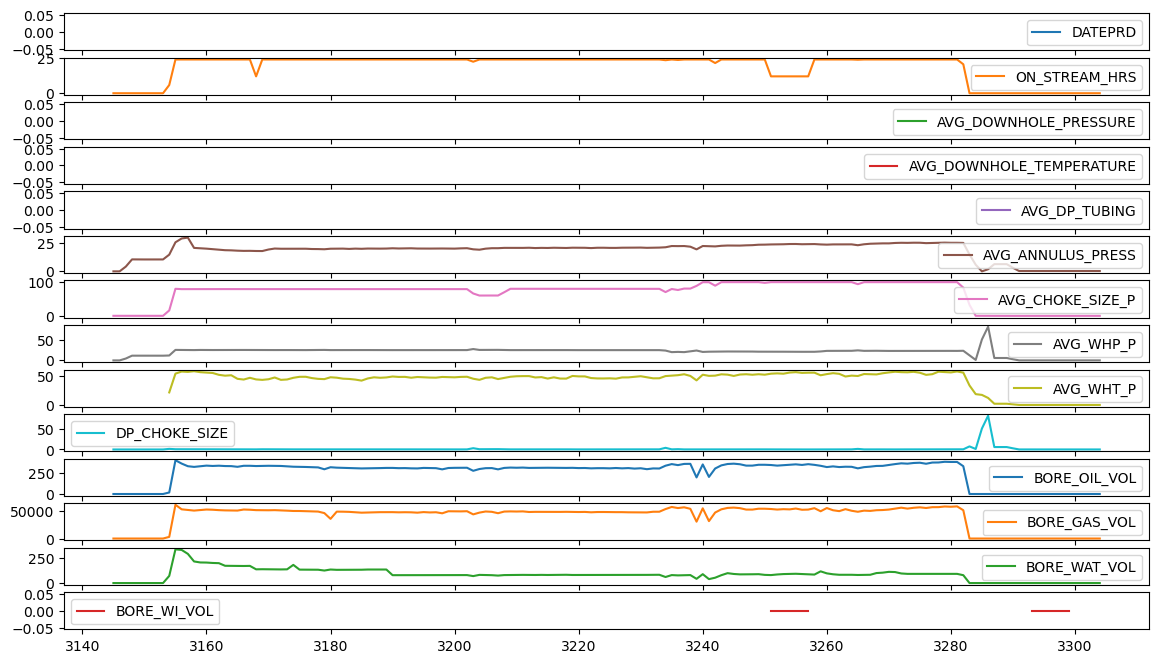

In [63]:
prod_2.plot(subplots=True, figsize=(14, 8))

In [65]:
prod_2.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,160.000000,0.0,0.0,0.0,160.000000,160.000000,160.000000,151.000000,160.000000,160.000000,160.000000,160.000000,15.0
mean,18.583312,NaN,NaN,NaN,17.959994,68.844518,21.323162,43.189106,1.309100,257.268750,41011.437500,84.600000,0.0
std,9.603513,NaN,NaN,NaN,7.571457,34.867560,10.113617,17.045282,7.804691,131.092781,20887.096124,59.446419,0.0
min,0.000000,NaN,NaN,NaN,0.000000,0.558970,0.000000,0.228000,0.000000,0.000000,0.000000,0.000000,0.0
25%,18.442500,NaN,NaN,NaN,18.951750,78.733778,21.569500,45.296000,0.139750,297.750000,47710.750000,77.000000,0.0
50%,24.000000,NaN,NaN,NaN,20.212500,79.519230,25.537500,48.360000,0.216000,308.000000,49502.500000,81.000000,0.0
75%,24.000000,NaN,NaN,NaN,22.532000,94.997033,25.693250,52.704500,0.321750,332.000000,53113.250000,98.250000,0.0
max,24.000000,NaN,NaN,NaN,29.454000,100.000000,83.865000,58.343000,83.865000,397.000000,62251.000000,334.000000,0.0


In [67]:
date_overlap2 = prod_2["DATEPRD"].isin(inj_1["DATEPRD"])
date_overlap2.shape

(160,)